In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=891, step=1)

In [ ]:
data.loc[3, ['PassengerId']]

PassengerId    4
Name: 3, dtype: object

In [ ]:
data.iloc[3, [0]]

PassengerId    4
Name: 3, dtype: object

In [ ]:
data.loc[:, :]

In [ ]:
print("Total entries: {}".format(len(data)))

Total entries: 891


In [ ]:
len(data)

891

In [ ]:
data.values.shape

(891, 12)

In [ ]:
data.shape

(891, 12)

##  NAN

In [ ]:
for i in range(len(data.columns)):
  print("{:20} has {:5} NaN values with {:4.2f}%".format(data.columns[i], data.iloc[:,i].isna().sum(),\
                                                        100*data.iloc[:,i].isna().sum()/len(data)))

PassengerId          has     0 NaN values with 0.00%
Survived             has     0 NaN values with 0.00%
Pclass               has     0 NaN values with 0.00%
Name                 has     0 NaN values with 0.00%
Sex                  has     0 NaN values with 0.00%
Age                  has   177 NaN values with 19.87%
SibSp                has     0 NaN values with 0.00%
Parch                has     0 NaN values with 0.00%
Ticket               has     0 NaN values with 0.00%
Fare                 has     0 NaN values with 0.00%
Cabin                has   687 NaN values with 77.10%
Embarked             has     2 NaN values with 0.22%


In [ ]:
data.Cabin.isna().sum()

687

In [ ]:
data.Age.isna().sum()

177

In [ ]:
dataAge = data.loc[:, ['Age']]

In [ ]:
type(dataAge)

pandas.core.frame.DataFrame

In [ ]:
import seaborn as sns

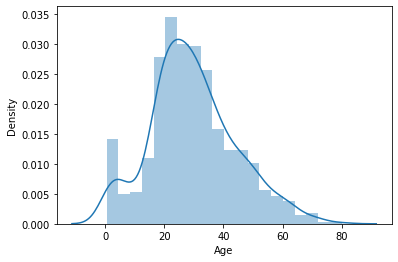

In [ ]:
sns.distplot(dataAge['Age'])

In [ ]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'constant',  fill_value = -10)
data_t = obj.fit_transform(dataAge)

In [ ]:
type(dataAge)

pandas.core.frame.DataFrame

In [ ]:
type(data_t)

numpy.ndarray

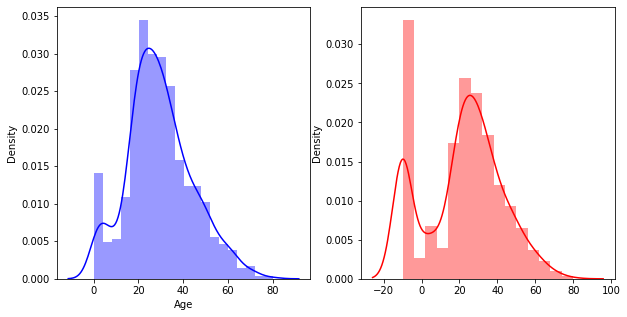

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.distplot(dataAge['Age'], ax = ax[0], color='blue')
sns.distplot(data_t[:,0], ax = ax[1], color='red')

In [ ]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'mean')
data_t = obj.fit_transform(dataAge)

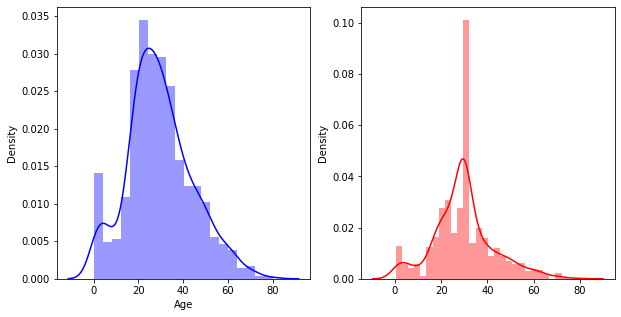

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.distplot(dataAge['Age'], ax = ax[0], color='blue')
sns.distplot(data_t[:,0], ax = ax[1], color='red')

## UNIQUE

In [ ]:
for i in range(len(data.columns)):
  print("{:4} has {:5} unique values with {:4.2f}%".format(i, len(data.iloc[:,i].dropna().unique()),\
                                                           100*len(data.iloc[:,i].dropna().unique())/len(data.iloc[:,i].dropna())))

   0 has   891 unique values with 100.00%
   1 has     2 unique values with 0.22%
   2 has     3 unique values with 0.34%
   3 has   891 unique values with 100.00%
   4 has     2 unique values with 0.22%
   5 has    88 unique values with 12.32%
   6 has     7 unique values with 0.79%
   7 has     7 unique values with 0.79%
   8 has   681 unique values with 76.43%
   9 has   248 unique values with 27.83%
  10 has   147 unique values with 72.06%
  11 has     3 unique values with 0.34%


In [ ]:
discrete = []
for i in range(len(data.columns)):
  percentage = 100*len(data.iloc[:,i].dropna().unique())/len(data.iloc[:,i].dropna())
  if percentage < 10:
    discrete.append(i)
    print("{:20} has {:5} unique values with {:4.2f}%".format(data.columns[i], len(data.iloc[:,i].dropna().unique()), percentage))

Survived             has     2 unique values with 0.22%
Pclass               has     3 unique values with 0.34%
Sex                  has     2 unique values with 0.22%
SibSp                has     7 unique values with 0.79%
Parch                has     7 unique values with 0.79%
Embarked             has     3 unique values with 0.34%


In [ ]:
discrete

[1, 2, 4, 6, 7, 11]

In [ ]:
data.columns[discrete]

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [ ]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
for i in discrete:
  print(data.columns[i])

Survived
Pclass
Sex
SibSp
Parch
Embarked


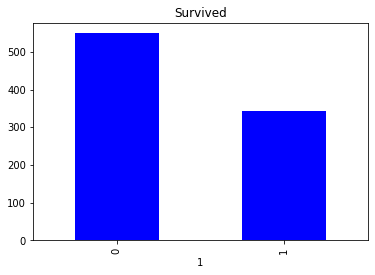

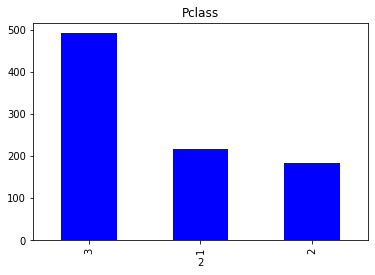

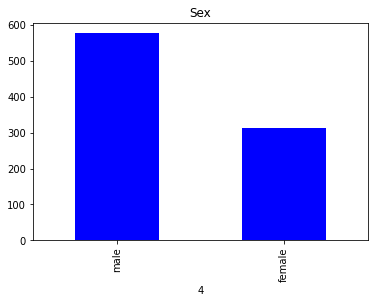

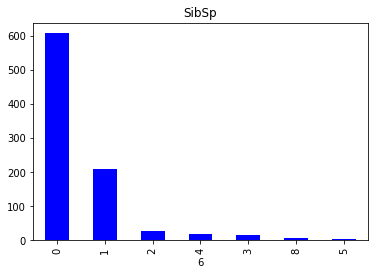

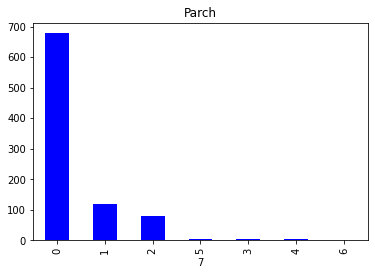

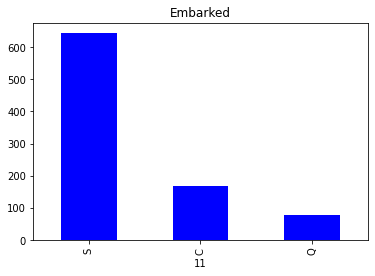

In [ ]:
for i in discrete:
  plt.figure()
  data.iloc[:,i].value_counts().plot.bar(color='blue')

  plt.xlabel(i)
  plt.title(data.columns[i])
  plt.show()

# OUTLIERS

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

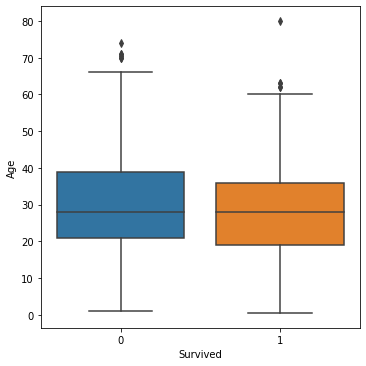

In [ ]:
sns.catplot(x="Survived", y="Age", kind="box", data=data)
sns.despine(left=False, right=False, top=False)

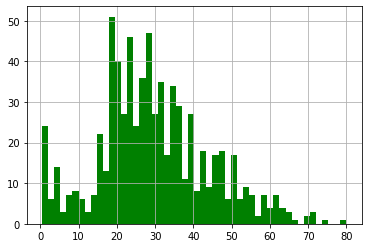

In [ ]:
data.Age.hist(bins=50, color='green')

In [ ]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
data_processed = data.copy()

_temp = np.ceil(data['Age'].mean() + 1.5 * data['Age'].std())
data_processed.loc[data_processed.Age >= _temp, 'Age'] = _temp

_temp = np.ceil(data['Age'].mean() - 1.5 * data['Age'].std())
data_processed.loc[data_processed.Age <= _temp, 'Age'] = _temp


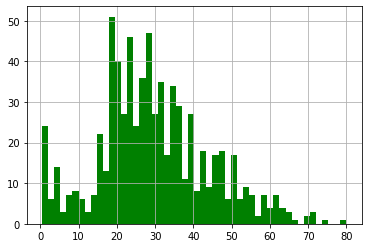

In [ ]:
data.Age.hist(bins=50, color='green')

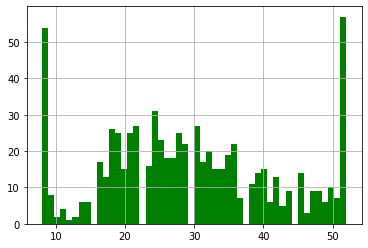

In [ ]:
data_processed.Age.hist(bins=50, color='green')

# Feature Scaling

In [ ]:
dataAge.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


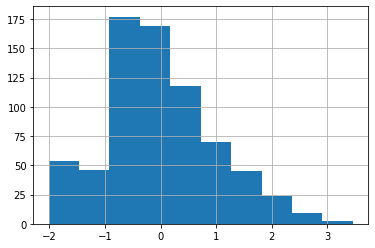

In [ ]:
dataAge.Age.hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
obj = MinMaxScaler()
dataAge = obj.fit_transform(dataAge)

In [ ]:
dataAge = pd.DataFrame(dataAge, columns = ['Age'])
type(dataAge)

pandas.core.frame.DataFrame

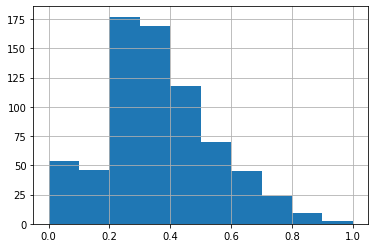

In [ ]:
dataAge.Age.hist()

# Label Encoding

In [ ]:
data_processed = data.copy()

In [ ]:
data_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
idx = list(data_processed.columns).index('Sex')

In [ ]:
idx

4

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data_processed.iloc[:, idx] = labelencoder_X.fit_transform(data_processed.iloc[:, idx])

In [ ]:
data_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


# One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown = 'ignore')
temp = onehotencoder.fit_transform(data_processed.iloc[:, [idx]]).toarray()

In [ ]:
type(temp)

numpy.ndarray

In [ ]:
data_processed.values.shape

(891, 12)

In [ ]:
temp.shape

(891, 2)

In [ ]:
data_processed = data_processed.drop(columns = [data.columns[idx]])

In [ ]:
data_processed.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_processed = pd.concat([pd.DataFrame(temp), data_processed], axis=1)

In [ ]:
data_processed.head()

,0,1,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,1.0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,0.0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,0.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,0.0,1.0,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
